<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This part is to be familiarized with Sympy

In [15]:
# Define a function using Sympy

from sympy import *
import matplotlib.pyplot as plt
import numpy as np


x =symbols('x')
f = ((x**2)*cos(x)-x)/10

# for a multivariate function

y, z = symbols('y z')
g = y**2 + z **2 +y*z

In [12]:
# define a function for fixed parameters

exp =f.subs(x,4)
exp

8*cos(4)/5 - 2/5

In [13]:
# compute the fucntion value for the fixed parameter
value = exp.evalf()
value

-1.44582979338178

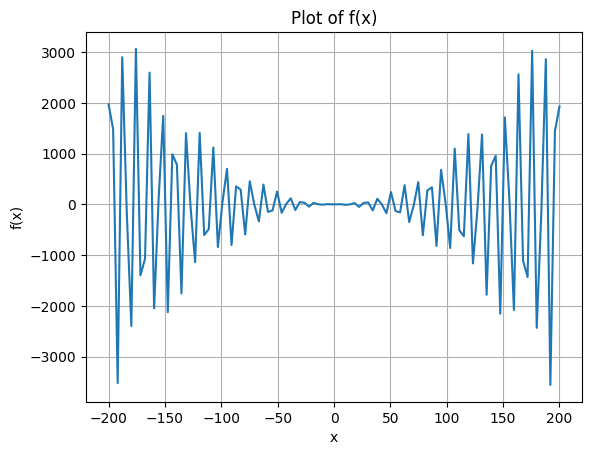

In [18]:
# Generate x values from -200 to 200
x_vals = np.linspace(-200, 200, 100)

# Calculate corresponding f(x) values
f_vals = [f.subs(x,x_val).evalf() for x_val in x_vals]

# Plot f(x)
plt.plot(x_vals, f_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()




---



In [65]:
# Soliving the equation f(x) = 0 using Sympy.solve

f1 = x**2-4*5+4
f2 = x**2+4*x-5
solution1, solution2 = solve(f1), solve(f2)
solution1, solution2

([-4, 4], [-5, 1])

In [35]:
# Compute the derivatives of f and g

f_prime = f.diff(x)

g_prime_y, g_prime_z = g.diff(y), g.diff(z)
f_prime, g_prime_y, g_prime_z

# solve f(x) = 0
solve(f) # impossible to solve (see the graph of x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation x**2*cos(x)/10 - x/10

In [43]:
# Using gradient descent to solve f'(x)= 0

gamma = 0.1
theta = 1
for i in range(100):
  theta = theta - gamma*f_prime.subs(x,theta).evalf()
  print(theta)

1.00760866373072
1.01543447208524
1.02348811690054
1.03178098502493
1.04032521460016
1.04913375672525
1.05822044308576
1.06760006020165
1.07728843102390
1.08730250469711
1.09766045540238
1.10838179130294
1.11948747473618
1.13100005492957
1.14294381466628
1.15534493248913
1.16823166220916
1.18163453167655
1.19558656297570
1.21012351641899
1.22528416092986
1.24111057361575
1.25764847152155
1.27494757870292
1.29306203183673
1.31205082754704
1.33197831440850
1.35291473210445
1.37493679934033
1.39812835067093
1.42258102015219
1.44839496634645
1.47567962824648
1.50455449453446
1.53514985845660
1.56760751641812
1.60208134884051
1.63873769519309
1.67775539941768
1.71932535499687
1.76364931854220
1.81093768556010
1.86140583241948
1.91526852880049
1.97273182644230
2.03398175598668
2.09916915502756
2.16839007178099
2.24166153109458
2.31889312227203
2.39985596964522
2.48415219992127
2.57118987015436
2.66017001828484
2.75009325238845
2.83979211552791
2.92799161479733
3.01339398212348
3.094776566643



---



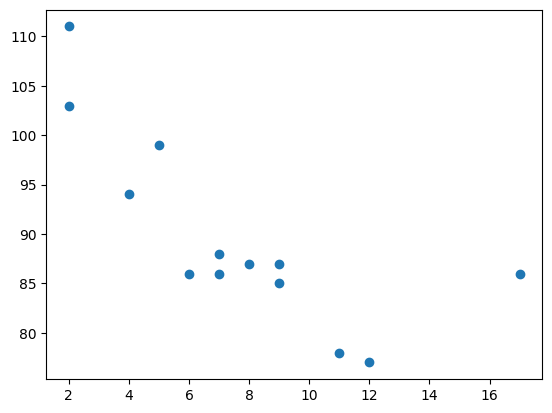

In [75]:
# Use the linear regression to solve a problem

x_data = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y_data = [99,86,87,88,111,86,103,87,94,78,77,85,86]
plt.scatter(x_data, y_data)
plt.show()

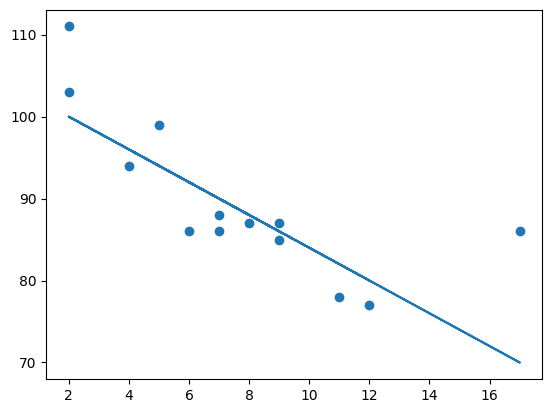

In [55]:
# Define and draw a line
def reg_func(x, slope, intercept):
  return slope * x + intercept

line= [reg_func(x, -2, 104) for x in x_data]
plot = plt.scatter(x_data, y_data)
plt.plot(x_data, line)

In [60]:
# defining the loss function (quadratic loss)

theta, theta_0 = symbols('theta theta_0')
loss = 0
loss = sum((y - reg_func(x, theta, theta_0))**2 for x, y in zip(x_data, y_data))
loss

(-17*theta - theta_0 + 86)**2 + (-12*theta - theta_0 + 77)**2 + (-11*theta - theta_0 + 78)**2 + (-9*theta - theta_0 + 85)**2 + (-9*theta - theta_0 + 87)**2 + (-8*theta - theta_0 + 87)**2 + (-7*theta - theta_0 + 86)**2 + (-7*theta - theta_0 + 88)**2 + (-6*theta - theta_0 + 86)**2 + (-5*theta - theta_0 + 99)**2 + (-4*theta - theta_0 + 94)**2 + (-2*theta - theta_0 + 103)**2 + (-2*theta - theta_0 + 111)**2

In [67]:
# compute the gradient of loss
grad_loss_1 = diff(loss, theta)
grad_loss_2 = diff(loss, theta_0)


In [69]:
sol = solve((grad_loss_1, grad_loss_2), (theta, theta_0))
sol

{theta: -2380/1359, theta_0: 15569/151}

In [79]:
# compute the perferct regression using sklearn

from sklearn.linear_model import LinearRegression
x_data = np.array(x_data)
y_data = np.array(y_data)
reg = LinearRegression().fit(x_data, y_data)
reg.coef_, reg.intercept_


(array([-1.75128771]), 103.10596026490066)



---



In [80]:
# Use Linear regression on real dataset
from sklearn.datasets import load_iris

iris = load_iris()
x_data = iris.data[:, :2]
y_data = iris.target
reg = LinearRegression().fit(x_data, y_data)
reg.coef_, reg.intercept_


(array([ 0.73474169, -0.63781099]), -1.3433397922944712)